# Data Quality for Beginner

## Data Profiling

In [1]:
import pandas as pd
import numpy as np
import io
import pandas_profiling
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

# Kolom city
length_city = len(retail_raw['city'])
print('Length kolom city:',length_city)

# Tugas Praktek: Kolom product_id
length_product_id = len(retail_raw['product_id'])
print('Length kolom product_id:',length_product_id)

Length kolom city: 5000
Length kolom product_id: 5000


In [2]:
# Tugas praktek: count kolom product_id
count_product_id = retail_raw['product_id'].count()
print('Count kolom product_id:',count_product_id)

Count kolom product_id: 4989


In [3]:
# Kolom city
length_city = len(retail_raw['city'])
count_city = retail_raw['city'].count()
# Kolom product id
length_product_id = len(retail_raw['product_id'])
count_product_id = retail_raw['product_id'].count()

# Missing value pada kolom city
number_of_missing_values_city = length_city-count_city
float_of_missing_values_city = float(number_of_missing_values_city/length_city)
pct_of_missing_values_city = '{0:.1f}%'.format(float_of_missing_values_city*100)
print('Persentase missing value kolom city:', pct_of_missing_values_city)

# Tugas praktek: Missing value pada kolom product_id
number_of_missing_values_product_id = length_product_id-count_product_id
float_of_missing_values_product_id = float(number_of_missing_values_product_id/length_product_id)
pct_of_missing_values_product_id = '{0:.1f}%'.format(float_of_missing_values_product_id * 100)
print('Persentase missing value kolom product_id:', pct_of_missing_values_product_id)

Persentase missing value kolom city: 0.3%
Persentase missing value kolom product_id: 0.2%


In [5]:
print('Kolom quantity')
print('Minimum value: ', retail_raw['quantity'].min())
print('Maximum value: ', retail_raw['quantity'].max())
print('Mean value: ', retail_raw['quantity'].mean())
print('Mode value: ', retail_raw['quantity'].mode())
print('Median value: ', retail_raw['quantity'].median())
print('Standard Deviation value: ', retail_raw['quantity'].std())

# Tugas praktek: Deskriptif statistics kolom item_price
print('')
print('Kolom item_price')
print('Minimum value: ', retail_raw['item_price'].min())
print('Maximum value: ', retail_raw['item_price'].max())
print('Mean value: ', retail_raw['item_price'].mean())
print('Median value: ', retail_raw['item_price'].median())
print('Standard Deviation value: ', retail_raw['item_price'].std())

Kolom quantity
Minimum value:  1.0
Maximum value:  720.0
Mean value:  11.423987164059366
Mode value:  0    1.0
dtype: float64
Median value:  5.0
Standard Deviation value:  29.44202501081146

Kolom item_price
Minimum value:  26000.0
Maximum value:  29762000.0
Mean value:  933742.7311008623
Median value:  604000.0
Standard Deviation value:  1030829.8104242847


In [4]:
# Quantile statistics kolom quantity
print('Kolom quantity:')
print(retail_raw['quantity'].quantile([0.25, 0.5, 0.75]))

# Tugas praktek: Quantile statistics kolom item_price
print('')
print('Kolom item_price:')
print(retail_raw['item_price'].quantile([0.25,0.5,0.75]))

Kolom quantity:
0.25     2.0
0.50     5.0
0.75    12.0
Name: quantity, dtype: float64

Kolom item_price:
0.25     450000.0
0.50     604000.0
0.75    1045000.0
Name: item_price, dtype: float64


In [5]:
print('Korelasi quantity dengan item_price')
print(retail_raw[['quantity', 'item_price']].corr())

Korelasi quantity dengan item_price
            quantity  item_price
quantity    1.000000   -0.133936
item_price -0.133936    1.000000


Pandas Profiling in Google Colab

In [11]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 6.1 MB/s 
     |████████████████████████████████| 596 kB 5.2 MB/s 
     |████████████████████████████████| 102 kB 43.6 MB/s 
     |████████████████████████████████| 690 kB 46.6 MB/s 
     |████████████████████████████████| 4.7 MB 43.1 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 812 kB 39.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262599 sha256=8fc109a9b712c72150b0e43286665799a604244a398579dca6455af8c32781c7
  Stored in directory: /tmp/pip-ephem-wheel-cache-sc4t1nhb/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=9d0c73bf2b39a84cc8b24d0ec0f3d6d5b6728401f734e9a5370

In [6]:
import pandas_profiling
pandas_profiling.ProfileReport(retail_raw)

Output hidden; open in https://colab.research.google.com to view.

## Data Cleansing

In [7]:
# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(retail_raw.isnull().any())

# Filling the missing value (imputasi)
print('\nFilling the missing value (imputasi):')
print(retail_raw['quantity'].fillna(retail_raw.quantity.mean()))

# Drop missing value
print('\nDrop missing value:')
print(retail_raw['quantity'].dropna())

Check kolom yang memiliki missing data:
order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool

Filling the missing value (imputasi):
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64

Drop missing value:
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 4986, dtype: float64


In [9]:
#mengisi kolom item_price dengan mean dari item_price
print(retail_raw['item_price'].fillna(retail_raw['item_price'].mean()))

0       7.400000e+05
1       6.040000e+05
2       1.045000e+06
3       2.050000e+05
4       9.337427e+05
            ...     
4995    4.500000e+05
4996    1.465000e+06
4997    7.470000e+05
4998    6.950000e+05
4999    1.045000e+06
Name: item_price, Length: 5000, dtype: float64


In [10]:
# Q1, Q3, dan IQR
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1-1.5*IQR)) | (retail_raw['quantity'] > (Q3+1.5*IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (5000, 9)
Shape akhir:  (4699, 9)


In [11]:
# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', retail_raw.shape)

# Buang data yang terduplikasi
retail_raw.drop_duplicates(inplace=True)

# Check ukuran (baris dan kolom) setelah data duplikasi dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (4699, 9)
Shape akhir:  (4692, 9)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


## Mini Project

In [12]:
import pandas as pd
import numpy as np
import io
import pandas_profiling

# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

#inspeksi dataframe uncleaned_raw
print('Lima data teratas:') 
print(uncleaned_raw.head())

#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:') 
print(uncleaned_raw.isnull().any())

#Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()

#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty) 

#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty*100) 

#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

Lima data teratas:
   InvoiceNo                          Description  Quantity     InvoiceDate  \
0     536365   WHITE HANGING HEART T-LIGHT HOLDER       6.0  12/01/10 08.26   
1     536366                  WHITE METAL LANTERN       6.0  12/01/10 08.26   
2     536367       CREAM CUPID HEARTS COAT HANGER       8.0  12/01/10 08.26   
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE       6.0  12/01/10 08.26   
4     536369       RED WOOLLY HOTTIE WHITE HEART.       6.0  12/01/10 08.26   

   UnitPrice  CustomerID      City  
0      29000       17850  Surabaya  
1      41000       17850  Surabaya  
2      18000       17850  Surabaya  
3      38000       17850   Jakarta  
4      27000       17850     Medan  

Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool
Persentase missing value kolom Quantity: 4.0%


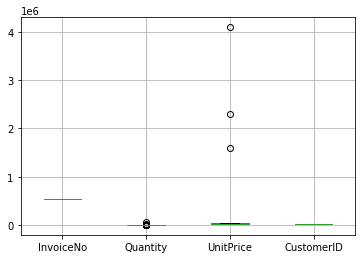

In [14]:
import matplotlib.pyplot as plt
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

In [15]:
# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1-1.5*IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3+1.5*IQR)))]

#check for duplication
print(uncleaned_raw.duplicated(subset=None))

#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()

0      False
1      False
2      False
3      False
4      False
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 505, dtype: bool


# Data Manipulation with Pandas-part 1

## Read CSV and TSV

In [16]:
import pandas as pd
# File CSV
df_csv = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
print(df_csv.head(3)) # Menampilkan 3 data teratas
# File TSV
df_tsv = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_tsv.tsv", sep='\t')
print(df_tsv.head(3)) # Menampilkan 3 data teratas

   order_id  order_date  customer_id             city     province product_id  \
0   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0648   
1   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3826   
2   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1508   

     brand  quantity  item_price  
0  BRAND_C         4     1934000  
1  BRAND_V         8      604000  
2  BRAND_G        12      747000  
   order_id  order_date  customer_id             city     province product_id  \
0   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0648   
1   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3826   
2   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1508   

     brand  quantity  item_price  
0  BRAND_C         4     1934000  
1  BRAND_V         8      604000  
2  BRAND_G        12      747000  


## Read Excel

In [17]:
df_excel = pd.read_excel("https://storage.googleapis.com/dqlab-dataset/sample_excel.xlsx", sheet_name="test")
print(df_excel.head(4)) # Menampilkan 4 data teratas

   order_id  order_date  customer_id             city     province product_id  \
0   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0648   
1   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3826   
2   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1508   
3   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0520   

     brand  quantity  item_price  
0  BRAND_C         4     1934000  
1  BRAND_V         8      604000  
2  BRAND_G        12      747000  
3  BRAND_B        12      450000  


## Read JSON

In [18]:
url = "https://storage.googleapis.com/dqlab-dataset/covid2019-api-herokuapp-v2.json"
df_json = pd.read_json(url)
print(df_json.head(10)) # Menampilkan 10 data teratas

                                                data          dt          ts
0  {'location': 'US', 'confirmed': 3363056, 'deat...  07-14-2020  1594684800
1  {'location': 'Brazil', 'confirmed': 1884967, '...  07-14-2020  1594684800
2  {'location': 'India', 'confirmed': 906752, 'de...  07-14-2020  1594684800
3  {'location': 'Russia', 'confirmed': 732547, 'd...  07-14-2020  1594684800
4  {'location': 'Peru', 'confirmed': 330123, 'dea...  07-14-2020  1594684800
5  {'location': 'Chile', 'confirmed': 317657, 'de...  07-14-2020  1594684800
6  {'location': 'Mexico', 'confirmed': 304435, 'd...  07-14-2020  1594684800
7  {'location': 'United Kingdom', 'confirmed': 29...  07-14-2020  1594684800
8  {'location': 'South Africa', 'confirmed': 2877...  07-14-2020  1594684800
9  {'location': 'Iran', 'confirmed': 259652, 'dea...  07-14-2020  1594684800


## Read Dataset - Google BigQuery

In [ ]:
query = '''
SELECT * FROM
`bigquery-public-data.covid19_jhu_csse_eu.summary`
'''
df_bq = pd.read_gbq(query,project_id='ab')
df_bq

## Write dataset
.to_csv(),.to_clipboard(),.to_excel(),.to_gbq() 

## Indexing

In [19]:
import pandas as pd
# Baca file TSV sample_tsv.tsv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_tsv.tsv",sep="\t")
# Index dari df
print("Index:",df.index)
# Column dari df
print("Columns:",df.columns)

Index: RangeIndex(start=0, stop=101, step=1)
Columns: Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price'],
      dtype='object')


In [20]:
df_x = df.set_index(['order_date', 'city', 'customer_id'])
# Print nama dan level dari multi index
for name, level in zip(df_x.index.names, df_x.index.levels):
    print(name,':',level)

order_date : Index(['2019-01-01'], dtype='object', name='order_date')
city : Index(['Bogor', 'Jakarta Pusat', 'Jakarta Selatan', 'Jakarta Utara',
       'Makassar', 'Malang', 'Surabaya', 'Tangerang'],
      dtype='object', name='city')
customer_id : Int64Index([12681, 13963, 15649, 17091, 17228, 17450, 17470, 17511, 17616,
            18055],
           dtype='int64', name='customer_id')


In [22]:
df_x.head()

order_id     province product_id  \
order_date city            customer_id                                     
2019-01-01 Jakarta Selatan 18055         1612339  DKI Jakarta      P0648   
                           18055         1612339  DKI Jakarta      P3826   
                           18055         1612339  DKI Jakarta      P1508   
                           18055         1612339  DKI Jakarta      P0520   
                           18055         1612339  DKI Jakarta      P1513   

                                          brand  quantity  item_price  
order_date city            customer_id                                 
2019-01-01 Jakarta Selatan 18055        BRAND_C         4     1934000  
                           18055        BRAND_V         8      604000  
                           18055        BRAND_G        12      747000  
                           18055        BRAND_B        12      450000  
                           18055        BRAND_G         3     1500000

In [25]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_tsv.tsv", sep="\t", nrows=10)
# Cetak data frame awal
print("Dataframe awal:\n", df)
# Set index baru
df.index = ["Pesanan ke-" + str(i) for i in range(1, 11)]
# Cetak data frame dengan index baru
print("Dataframe dengan index baru:\n", df)

Dataframe awal:
    order_id  order_date  customer_id             city     province product_id  \
0   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0648   
1   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3826   
2   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1508   
3   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0520   
4   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1513   
5   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3911   
6   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1780   
7   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3132   
8   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1342   
9   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P2556   

     brand  quantity  item_price  
0  BRAND_C         4     1934000  
1  BRAND_V         8 

In [26]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_tsv.tsv", sep="\t", index_col=["order_date","order_id"])
# Cetak data frame untuk 8 data teratas
print("Dataframe:\n", df.head(8))

Dataframe:
                      customer_id             city     province product_id  \
order_date order_id                                                         
2019-01-01 1612339         18055  Jakarta Selatan  DKI Jakarta      P0648   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P3826   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P1508   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P0520   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P1513   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P3911   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P1780   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P3132   

                       brand  quantity  item_price  
order_date order_id                                 
2019-01-01 1612339   BRAND_C         4     1934000  
           1612339   BRAND_V         8      604000  
     

## Slicing

In [30]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Slice langsung berdasarkan kolom
df_slice = df.loc[(df["customer_id"] == 18055) &
		          (df["product_id"].isin(["P0029","P0040","P0041","P0116","P0117"]))
				 ]
print("Slice langsung berdasarkan kolom:\n", df_slice)

Slice langsung berdasarkan kolom:
 Empty DataFrame
Columns: [order_id, order_date, customer_id, city, province, product_id, brand, quantity, item_price]
Index: []


In [31]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Slice langsung berdasarkan kolom
df_slice = df.loc[(df["order_date"] == '2019-01-01') &
		          (df["product_id"].isin(["P2154","P2256"]))
				 ]
df_slice

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
10,1612339,2019-01-01,18055,Jakarta Selatan,DKI Jakarta,P2154,BRAND_M,4,1745000


In [32]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Set index dari df sesuai instruksi
df = df.set_index(["order_date","order_id","product_id"])
# Slice sesuai intruksi
df_slice = df.loc[("2019-01-01",1612339,["P2154","P2159"]),:]
print("Slice df:\n", df_slice)

Slice df:
                                 customer_id             city     province  \
order_date order_id product_id                                              
2019-01-01 1612339  P2154             18055  Jakarta Selatan  DKI Jakarta   
                    P2159             18055  Jakarta Selatan  DKI Jakarta   

                                  brand  quantity  item_price  
order_date order_id product_id                                 
2019-01-01 1612339  P2154       BRAND_M         4     1745000  
                    P2159       BRAND_M        24      310000  


## Cast data type of column

In [33]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Tampilkan tipe data
print("Tipe data df:\n", df.dtypes)
# Ubah tipe data kolom quantity menjadi tipe data numerik float
df["quantity"] = pd.to_numeric(df["quantity"], downcast="float")
# Ubah tipe data kolom city menjadi tipe data category
df["city"] = df["city"].astype("category")
# Tampilkan tipe data df setelah transformasi
print("\nTipe data df setelah transformasi:\n", df.dtypes)

Tipe data df:
 order_id        int64
order_date     object
customer_id     int64
city           object
province       object
product_id     object
brand          object
quantity        int64
item_price      int64
dtype: object

Tipe data df setelah transformasi:
 order_id          int64
order_date       object
customer_id       int64
city           category
province         object
product_id       object
brand            object
quantity        float32
item_price        int64
dtype: object


In [34]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Tampilkan tipe data
print("Tipe data df:\n", df.dtypes)
# Ubah tipe data kolom order_date menjadi datetime
df["order_date"] = pd.to_datetime(df["order_date"])
# Tampilkan tipe data df setelah transformasi
print("\nTipe data df setelah transformasi:\n", df.dtypes)

Tipe data df:
 order_id        int64
order_date     object
customer_id     int64
city           object
province       object
product_id     object
brand          object
quantity        int64
item_price      int64
dtype: object

Tipe data df setelah transformasi:
 order_id                int64
order_date     datetime64[ns]
customer_id             int64
city                   object
province               object
product_id             object
brand                  object
quantity                int64
item_price              int64
dtype: object


## Map and apply function to column

In [35]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Cetak 5 baris teratas kolom brand
print("Kolom brand awal:\n", df["brand"].head())
# Gunakan method apply untuk merubah isi kolom menjadi lower case
df["brand"] = df["brand"].apply(lambda x: x.lower())
# Cetak 5 baris teratas kolom brand
print("Kolom brand setelah apply:\n", df["brand"].head())
# Gunakan method map untuk mengambil kode brand yaitu karakter terakhirnya
df["brand"] = df["brand"].map(lambda x: x[-1])
# Cetak 5 baris teratas kolom brand
print("Kolom brand setelah map:\n", df["brand"].head())

Kolom brand awal:
 0    BRAND_C
1    BRAND_V
2    BRAND_G
3    BRAND_B
4    BRAND_G
Name: brand, dtype: object
Kolom brand setelah apply:
 0    brand_c
1    brand_v
2    brand_g
3    brand_b
4    brand_g
Name: brand, dtype: object
Kolom brand setelah map:
 0    c
1    v
2    g
3    b
4    g
Name: brand, dtype: object


## Applymap

In [36]:
import numpy as np
import pandas as pd
# number generator, set angka seed menjadi suatu angka, bisa semua angka, supaya hasil random nya selalu sama ketika kita run
np.random.seed(1234)
# create dataframe 3 baris dan 4 kolom dengan angka random
df_tr = pd.DataFrame(np.random.rand(3,4)) 
# Cetak dataframe
print("Dataframe:\n", df_tr)
# Cara 1 dengan tanpa define function awalnya, langsung pake fungsi anonymous lambda x
df_tr1 = df_tr.applymap(lambda x: x**2+3*x+2) 
print("\nDataframe - cara 1:\n", df_tr1)
# Cara 2 dengan define function 
def qudratic_fun(x):
	return x**2+3*x+2
df_tr2 = df_tr.applymap(qudratic_fun)
print("\nDataframe - cara 2:\n", df_tr2)

Dataframe:
           0         1         2         3
0  0.191519  0.622109  0.437728  0.785359
1  0.779976  0.272593  0.276464  0.801872
2  0.958139  0.875933  0.357817  0.500995

Dataframe - cara 1:
           0         1         2         3
0  2.611238  4.253346  3.504789  4.972864
1  4.948290  2.892085  2.905825  5.048616
2  5.792449  5.395056  3.201485  3.753981

Dataframe - cara 2:
           0         1         2         3
0  2.611238  4.253346  3.504789  4.972864
1  4.948290  2.892085  2.905825  5.048616
2  5.792449  5.395056  3.201485  3.753981


## Missing Value

### Check null value of columns

In [38]:
import pandas as pd
# Baca file "public data covid19 jhu csse eu.csv"
df=pd.read_csv("https://storage.googleapis.com/dqlab-dataset/datacovid19.csv")
# Cetak info dari df
print(df.info())
# Cetak jumlah missing value di setiap kolom
mv = df.isna().sum()
print("\nJumlah missing value per kolom:\n",mv)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  960 non-null    object 
 1   country_region  1000 non-null   object 
 2   date            1000 non-null   object 
 3   latitude        874 non-null    float64
 4   longitude       874 non-null    float64
 5   location_geom   874 non-null    object 
 6   confirmed       1000 non-null   int64  
 7   deaths          999 non-null    float64
 8   recovered       999 non-null    float64
 9   active          949 non-null    float64
 10  fips            949 non-null    float64
 11  admin2          842 non-null    object 
 12  combined_key    0 non-null      float64
dtypes: float64(7), int64(1), object(5)
memory usage: 101.7+ KB
None

Jumlah missing value per kolom:
 province_state      40
country_region       0
date                 0
latitude           126
longitude          126
l

### Drop column with null

In [40]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/datacovid19.csv")
# Cetak ukuran awal dataframe
print("Ukuran awal df: %d baris, %d kolom." % df.shape)
# Drop kolom yang seluruhnya missing value dan cetak ukurannya
df = df.dropna(axis=1, how="all")
print("Ukuran df setelah buang kolom dengan seluruh data missing: %d baris, %d kolom." % df.shape)
# Drop baris jika ada satu saja data yang missing dan cetak ukurannya
df = df.dropna(axis=0, how="any")
print("Ukuran df setelah dibuang baris yang memiliki sekurangnya 1 missing value: %d baris, %d kolom." % df.shape)

Ukuran awal df: 1000 baris, 13 kolom.
Ukuran df setelah buang kolom dengan seluruh data missing: 1000 baris, 12 kolom.
Ukuran df setelah dibuang baris yang memiliki sekurangnya 1 missing value: 746 baris, 12 kolom.


### Fill column with value

In [42]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/datacovid19.csv")
# Cetak unique value pada kolom province_state
print("Unique value awal:\n", df["province_state"].unique())
# Ganti missing value dengan string "unknown_province_state"
df["province_state"] = df["province_state"].fillna("unknown_province_state")
# Cetak kembali unique value pada kolom province_state
print("Unique value setelah fillna:\n", df["province_state"].unique())

Unique value awal:
 [nan 'US' 'Guam' 'Iowa']
Unique value setelah fillna:
 ['unknown_province_state' 'US' 'Guam' 'Iowa']


In [44]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/datacovid19.csv")
# Cetak nilai mean dan median awal 
print("Awal: mean = %f, median = %f." % (df["active"].mean(), df["active"].median()))
# Isi missing value kolom active dengan median
df_median = df["active"].fillna(df["active"].median())
# Cetak nilai mean dan median awal setelah diisi dengan median
print("Fillna median: mean = %f, median = %f." % (df_median.mean(),df_median.median()))
# Isi missing value kolom active dengan mean
df_mean = df["active"].fillna(df["active"].mean())
# Cetak nilai mean dan median awal setelah diisi dengan mean
print("Fillna mean: mean = %f, median = %f." % (df_mean.mean(),df_mean.median()))

Awal: mean = 192.571128, median = 41.000000.
Fillna median: mean = 184.841000, median = 41.000000.
Fillna mean: mean = 192.571128, median = 49.000000.


### Interpolate

In [45]:
import numpy as np
import pandas as pd
# Data
ts = pd.Series({
   "2020-01-01":9,
   "2020-01-02":np.nan,
   "2020-01-05":np.nan,
   "2020-01-07":24,
   "2020-01-10":np.nan,
   "2020-01-12":np.nan,
   "2020-01-15":33,
   "2020-01-17":np.nan,
   "2020-01-16":40,
   "2020-01-20":45,
   "2020-01-22":52,
   "2020-01-25":75,
   "2020-01-28":np.nan,
   "2020-01-30":np.nan
})
# Isi missing value menggunakan interpolasi linier
ts = ts.interpolate()
# Cetak time series setelah interpolasi linier
print("Setelah diisi missing valuenya:\n", ts)

Setelah diisi missing valuenya:
 2020-01-01     9.0
2020-01-02    14.0
2020-01-05    19.0
2020-01-07    24.0
2020-01-10    27.0
2020-01-12    30.0
2020-01-15    33.0
2020-01-17    36.5
2020-01-16    40.0
2020-01-20    45.0
2020-01-22    52.0
2020-01-25    75.0
2020-01-28    75.0
2020-01-30    75.0
dtype: float64


## Mini Project

In [46]:
# 1. Baca dataset
print("[1] BACA DATASET")
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/retail_raw_test.csv", low_memory=False)
print("    Dataset:\n", df.head())
print("    Info:\n", df.info())

# 2. Ubah tipe data
print("\n[2] UBAH TIPE DATA")
df["customer_id"] = df["customer_id"].apply(lambda x: x.split("'")[1]).astype("int64")
df["quantity"] = df["quantity"].apply(lambda x:x.split("'")[1]).astype("int64")
df["item_price"] = df["item_price"].apply(lambda x:x.split("'")[1]).astype("int64")
print("    Tipe data:\n", df.dtypes)

# 3. Transform "product_value" supaya bentuknya seragam dengan format "PXXXX", assign ke kolom baru "product_id", dan drop kolom "product_value", jika terdapat nan gantilah dengan "unknown"
print("\n[3] TRANSFORM product_value MENJADI product_id")
# Buat fungsi
import math
def impute_product_value(val):
    if math.isnan(val):
        return "unknown"
    else:
        return 'P' + '{:0>4}'.format(str(val).split('.')[0])
# Buat kolom "product_id"
df["product_id"] = df["product_value"].apply(lambda x: impute_product_value(x))
# Hapus kolom "product_value"
df.drop(["product_value"], axis=1, inplace=True)
# Cetak 5 data teratas
print(df.head())

# 4. Tranform order_date menjadi value dengan format "YYYY-mm-dd"
print("\n[4] TRANSFORM order_date MENJADI FORMAT YYYY-mm-dd")
months_dict = {
   "Jan":"01",
   "Feb":"02",
   "Mar":"03",
   "Apr":"04",
   "May":"05",
   "Jun":"06",
   "Jul":"07",
   "Aug":"08",
   "Sep":"09",
   "Oct":"10",
   "Nov":"11",
   "Dec":"12"
}
df["order_date"] = pd.to_datetime(df["order_date"].apply(lambda x: str(x)[-4:] + "-" + months_dict[str(x)[:3]] + "-" + str(x)[4:7]))
print("    Tipe data:\n", df.dtypes)

# 5. Mengatasi data yang hilang di beberapa kolom
print("\n[5] HANDLING MISSING VALUE")
# Kolom "city" dan "province" masih memiliki missing value, nilai yang hilang di kedua kolom ini diisi saja dengan "unknown"
df[["city","province"]] = df[["city","province"]].fillna("unknown")
# Kolom brand juga masih memiliki missing value, Ganti value NaN menjadi "no_brand"
df["brand"] = df["brand"].fillna("no_brand")
# Cek apakah masih terdapat missing value di seluruh kolom 
print("    Info:\n", df.info())

# 6. Membuat kolom baru "city/province" dengan menggabungkan kolom "city" dan kolom "province" dan delete kolom asalnya
print("\n[6] MEMBUAT KOLOM BARU city/province")
df["city/province"] = df["city"] + "/" + df["province"]
# drop kolom "city" dan "province" karena telah digabungkan
df.drop(["city","province"], axis=1, inplace=True)
# Cetak 5 data teratas
print(df.head())

# 7. Membuat hierarchical index yang terdiri dari kolom "city/province", "order_date", "customer_id", "order_id", "product_id"
print("\n[7] MEMBUAT HIERACHICAL INDEX")
df = df.set_index(["city/province","order_date","customer_id","order_id","product_id"])
# urutkanlah berdasarkan index yang baru
df = df.sort_index()
# Cetak 5 data teratas
print(df.head())

# 8. Membuat kolom "total_price" yang formula nya perkalian antara kolom "quantity" dan kolom "item_price"
print("\n[8] MEMBUAT KOLOM total_price")
df["total_price"] = df["quantity"] * df["item_price"]
# Cetak 5 data teratas
print(df.head())

# 9. Slice dataset agar hanya terdapat data bulan Januari 2019
print("\n[9] SLICE DATASET UNTUK BULAN JANUARI 2019 SAJA")
idx = pd.IndexSlice
df_jan2019 = df.loc[idx[:, "2019-01-01":"2019-01-31"], :]
print("Dataset akhir:\n", df_jan2019)

# END OF PROJECT

[1] BACA DATASET
    Dataset:
    order_id    order_date customer_id           city     province    brand  \
0   1730350  Dec 11, 2019      '13447      Surakarta  Jawa Tengah  BRAND_F   
1   1677490  Jul 31, 2019          '0            NaN          NaN  BRAND_F   
2   1704211  Oct 18, 2019      '16128  Jakarta Pusat  DKI Jakarta  BRAND_H   
3   1679695  Aug 07, 2019      '16225     Yogyakarta   Yogyakarta  BRAND_H   
4   1679080  Aug 05, 2019          '0            NaN          NaN  BRAND_E   

  quantity item_price  product_value  
0      '24    '113000         1374.0  
1       '1   '1164000         1370.0  
2      '12    '747000         1679.0  
3       '6    '590000         1708.0  
4       '2    '740000         1201.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       5000 non-null   int64  
 1   order_date     5000 non

# Data Manipulation with Pandas-part 2

## Append

In [47]:
import pandas as pd
# Buat series of int (s1) dan series of string (s2)
s1 = pd.Series([1,2,3,4,5,6])
s2 = pd.Series(["a","b","c","d","e","f"])
# Terapkan method append
s2_append_s1 = s2.append(s1)
print("Series - append:\n", s2_append_s1)
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'a':[1,2],
		   'b':[3,4]})
df2 = pd.DataFrame({'b':[1,2],
		   'a':[3,4]})
# Terapkan method append
df2_append_df1 = df2.append(df1)
print("Dataframe - append:\n", df2_append_df1)

Series - append:
 0    a
1    b
2    c
3    d
4    e
5    f
0    1
1    2
2    3
3    4
4    5
5    6
dtype: object
Dataframe - append:
    b  a
0  1  3
1  2  4
0  3  1
1  4  2


## Concat

In [48]:
df1 = pd.DataFrame({'a':[1,2],
					'b':[3,4]})
df2 = pd.DataFrame({'b':[1,2],
					'a':[3,4]})
# Terapkan method concat row-wise
row_wise_concat = pd.concat([df2,df1])
print("Row-wise - concat:\n", row_wise_concat)
# Terapkan method concat column-wise
col_wise_concat = pd.concat([df2,df1],axis=1)
print("Column-wise - concat:\n", col_wise_concat)
# Penambahan identifier --> membentuk hasil penggabungan multiindex
multiindex_concat = pd.concat([df2,df1],axis=0,keys=['df2','df1'])
print("Multiindex - concat:\n", multiindex_concat)

Row-wise - concat:
    b  a
0  1  3
1  2  4
0  3  1
1  4  2
Column-wise - concat:
    b  a  a  b
0  1  3  1  3
1  2  4  2  4
Multiindex - concat:
        b  a
df2 0  1  3
    1  2  4
df1 0  3  1
    1  4  2


## Merge

In [49]:
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
})
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
})
# Merge yang ekivalen dengan SQL left join
merge_df_left = pd.merge(left=df2,right=df1,how='left',left_on='key',right_on='key')
print('Merge - Left:\n', merge_df_left)
# Merge yang ekivalen dengan SQL right join
merge_df_right = pd.merge(left=df2,right=df1,how='right',left_on='key',right_on='key')
print('Merge - Right:\n', merge_df_right)
# Merge yang ekivalen dengan SQL inner join
merge_df_inner = pd.merge(left=df2,right=df1,how='inner',left_on='key',right_on='key')
print('Merge - Inner:\n', merge_df_inner)
# Merge yang ekivalen dengan SQL outer join
merge_df_outer = pd.merge(left=df2,right=df1,how='outer',left_on='key',right_on='key')
print('Merge - Outer:\n', merge_df_outer)

Merge - Left:
    key  val3  val4   val1   val2
0   k1     1     6  200.0   30.0
1   k3     2     7    0.0  100.0
2   k5     3     8  100.0   10.0
3   k7     4     8    NaN    NaN
4  k10     5    10    NaN    NaN
Merge - Right:
   key  val3  val4  val1  val2
0  k1   1.0   6.0   200    30
1  k2   NaN   NaN   500    50
2  k3   2.0   7.0     0   100
3  k4   NaN   NaN   500    20
4  k5   3.0   8.0   100    10
Merge - Inner:
   key  val3  val4  val1  val2
0  k1     1     6   200    30
1  k3     2     7     0   100
2  k5     3     8   100    10
Merge - Outer:
    key  val3  val4   val1   val2
0   k1   1.0   6.0  200.0   30.0
1   k3   2.0   7.0    0.0  100.0
2   k5   3.0   8.0  100.0   10.0
3   k7   4.0   8.0    NaN    NaN
4  k10   5.0  10.0    NaN    NaN
5   k2   NaN   NaN  500.0   50.0
6   k4   NaN   NaN  500.0   20.0


In [50]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
}).set_index(['key','val2'])
print('Dataframe 1:\n', df1)
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
}).set_index(['key','val3'])
print('Dataframe 2:\n', df2)
# Merge dataframe yang memiliki multi index
df_merge = pd.merge(df1.reset_index(),df2.reset_index())
print('Merging dataframe:\n', df_merge)

Dataframe 1:
           val1
key val2      
k1  30     200
k2  50     500
k3  100      0
k4  20     500
k5  10     100
Dataframe 2:
           val4
key val3      
k1  1        6
k3  2        7
k5  3        8
k7  4        8
k10 5       10
Merging dataframe:
   key  val2  val1  val3  val4
0  k1    30   200     1     6
1  k3   100     0     2     7
2  k5    10   100     3     8


## Join

In [51]:
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
})
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
})
# Penerapan join dengan menggunakan set_index dan keyword how
join_df = df1.set_index('key').join(df2.set_index('key'),how='outer')
print(join_df)

      val1   val2  val3  val4
key                          
k1   200.0   30.0   1.0   6.0
k10    NaN    NaN   5.0  10.0
k2   500.0   50.0   NaN   NaN
k3     0.0  100.0   2.0   7.0
k4   500.0   20.0   NaN   NaN
k5   100.0   10.0   3.0   8.0
k7     NaN    NaN   4.0   8.0


## Dataset for Pivot

In [52]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Unique value pada setiap kolom data
for column in data.columns:
    print('Unique value %s: %s' % (column, data[column].unique()))

Unique value kelas: ['A' 'B']
Unique value murid: ['A1' 'A2' 'A3' 'B1' 'B2' 'B3']
Unique value pelajaran: ['math' 'english']
Unique value nilai: [ 90  60  70  85  50 100  40  95  80  45]


## Pivot

In [53]:
# Pivoting with single column measurement
pivot1 = data.pivot(index='murid',columns='pelajaran',values='nilai')
print('Pivoting with single column measurement:\n', pivot1)
# Pivoting with multiple column measurement
pivot2 = data.pivot(index='murid',columns='pelajaran')
print('Pivoting with multiple column measurement:\n', pivot2)

Pivoting with single column measurement:
 pelajaran  english  math
murid                   
A1              60    90
A2              85    70
A3              60    50
B1              40   100
B2              80    95
B3              45    60
Pivoting with multiple column measurement:
             kelas        nilai     
pelajaran english math english math
murid                              
A1              A    A      60   90
A2              A    A      85   70
A3              A    A      60   50
B1              B    B      40  100
B2              B    B      80   95
B3              B    B      45   60


## Pivot table

In [54]:
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='mean'
pivot_tab_mean = data.pivot_table(index='kelas',columns='pelajaran',values='nilai',aggfunc='mean')
print('Creating pivot table -- aggfunc mean:\n', pivot_tab_mean)
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='median'
pivot_tab_median = data.pivot_table(index='kelas',columns='pelajaran',values='nilai',aggfunc='median')
print('Creating pivot table -- aggfunc median:\n', pivot_tab_median)

Creating pivot table -- aggfunc mean:
 pelajaran    english  math
kelas                     
A          68.333333  70.0
B          55.000000  85.0
Creating pivot table -- aggfunc median:
 pelajaran  english  math
kelas                   
A               60    70
B               45    95


## Melt

In [55]:
# Pivoting dataframe
data_pivot = data.pivot_table(index='kelas',columns='pelajaran',values='nilai',aggfunc='mean').reset_index()
print('Pivoting dataframe:\n', data_pivot)
# [1] Melting dataframe data_pivot
data_melt_1 = pd.melt(data_pivot)
print('Melting dataframe:\n', data_melt_1)
# [2] Melting dataframe data_pivot dengan id_vars
data_melt_2 = pd.melt(data_pivot,id_vars='kelas')
print('Melting dataframe dengan idvars:\n', data_melt_2)

Pivoting dataframe:
 pelajaran kelas    english  math
0             A  68.333333  70.0
1             B  55.000000  85.0
Melting dataframe:
   pelajaran      value
0     kelas          A
1     kelas          B
2   english  68.333333
3   english       55.0
4      math       70.0
5      math       85.0
Melting dataframe dengan idvars:
   kelas pelajaran      value
0     A   english  68.333333
1     B   english  55.000000
2     A      math  70.000000
3     B      math  85.000000


In [56]:
# Pivoting dataframe
data_pivot = data.pivot_table(index='kelas',columns='pelajaran',values='nilai', aggfunc='mean').reset_index()
print('Pivoting dataframe:\n', data_pivot)
# [3.a] Melting dataframe data_pivot dengan value_vars
data_melt_3a = pd.melt(data_pivot,value_vars=['math'])
print('Melting dataframe dengan value_vars:\n', data_melt_3a)
# [3.b] Melting dataframe data_pivot dengan id_vars dan value_vars
data_melt_3b = pd.melt(data_pivot,id_vars='kelas',value_vars=['math'])
print('Melting dataframe dengan id_vars dan value_vars:\n', data_melt_3b)
# [4] Melting dataframe data_pivot dengan id_vars, value_vars, var_name. dan value_name
data_melt_4 = pd.melt(data_pivot,id_vars='kelas',value_vars=['english','math'],var_name='pelajaran',value_name='nilai')
print('Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:\n', data_melt_4)

Pivoting dataframe:
 pelajaran kelas    english  math
0             A  68.333333  70.0
1             B  55.000000  85.0
Melting dataframe dengan value_vars:
   pelajaran  value
0      math   70.0
1      math   85.0
Melting dataframe dengan id_vars dan value_vars:
   kelas pelajaran  value
0     A      math   70.0
1     B      math   85.0
Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:
   kelas pelajaran      nilai
0     A   english  68.333333
1     B   english  55.000000
2     A      math  70.000000
3     B      math  85.000000


## Stack and Unstack

In [57]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
print('Dataframe:\n', data)
# Set index data untuk kolom kelas, murid, dan pelajaran
data = data.set_index(['kelas','murid','pelajaran'])
print('Dataframe multi index:\n', data)
# [1] Unstacking dataframe
data_unstack_1 = data.unstack()
print('Unstacking dataframe:\n', data_unstack_1)
# [2] Unstacking dengan specify level name
data_unstack_2 = data.unstack(level='murid')
print('Unstacking dataframe dengan level name:\n', data_unstack_2)
# [3] Unstacking dengan specify level position
data_unstack_3 = data.unstack(level=1)
print('Unstacking dataframe dengan level position:\n', data_unstack_3)

Dataframe:
    kelas murid pelajaran  nilai
0      A    A1      math     90
1      A    A1   english     60
2      A    A2      math     70
3      A    A2   english     85
4      A    A3      math     50
5      A    A3   english     60
6      B    B1      math    100
7      B    B1   english     40
8      B    B2      math     95
9      B    B2   english     80
10     B    B3      math     60
11     B    B3   english     45
Dataframe multi index:
                        nilai
kelas murid pelajaran       
A     A1    math          90
            english       60
      A2    math          70
            english       85
      A3    math          50
            english       60
B     B1    math         100
            english       40
      B2    math          95
            english       80
      B3    math          60
            english       45
Unstacking dataframe:
               nilai     
pelajaran   english math
kelas murid             
A     A1         60   90
      A2         85

In [58]:
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
data = data.set_index(['kelas','murid','pelajaran'])
data_unstack = data.unstack(level=1)
print('Dataframe:\n', data_unstack)
# [1] Stacking dataframe
data_stack = data_unstack.stack()
print('Stacked dataframe:\n', data_stack)
# [2] Tukar posisi index setelah stacking dataframe
data_swap = data_stack.swaplevel(1,2)
print('Swapped data:\n', data_swap)
# [3] Melakukan sort_index pada stacking dataframe
data_sort = data_swap.sort_index()
print('Sorted data:\n', data_sort)

Dataframe:
                 nilai                               
murid              A1    A2    A3     B1    B2    B3
kelas pelajaran                                     
A     english    60.0  85.0  60.0    NaN   NaN   NaN
      math       90.0  70.0  50.0    NaN   NaN   NaN
B     english     NaN   NaN   NaN   40.0  80.0  45.0
      math        NaN   NaN   NaN  100.0  95.0  60.0
Stacked dataframe:
                        nilai
kelas pelajaran murid       
A     english   A1      60.0
                A2      85.0
                A3      60.0
      math      A1      90.0
                A2      70.0
                A3      50.0
B     english   B1      40.0
                B2      80.0
                B3      45.0
      math      B1     100.0
                B2      95.0
                B3      60.0
Swapped data:
                        nilai
kelas murid pelajaran       
A     A1    english     60.0
      A2    english     85.0
      A3    english     60.0
      A1    math        90.0
  

## Inspection Data for Aggregation

In [60]:
import pandas as pd
# Load data global_air_quality.csv
global_air_quality = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
print('Lima data teratas:\n', global_air_quality.head())
# Melakukan pengecekan terhadap data
print('Info global_air_quality:\n', global_air_quality.info())
# Melakukan count tanpa groupby
print('Count tanpa groupby:\n', global_air_quality.count())
# Melakukan count dengan groupby 
gaq_groupby_count = global_air_quality.groupby('source_name').count()
print('Count dengan groupby (5 data teratas):\n', gaq_groupby_count.head())

Lima data teratas:
                           location       city country pollutant  value  \
0                  MOBILE-KICKAPOO    LINCOLN      US      pm10   7.00   
1                  Oxford St Ebbes     Oxford      GB       no2  30.00   
2                 BROADWAY (South)  St. Louis      US      pm25   6.10   
3  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN      pm25  23.67   
4                        Manglerud       Oslo      NO      pm10  27.06   

                 timestamp   unit source_name   latitude  longitude  \
0  2017-01-18 16:00:00 UTC  µg/m³      AirNow  35.488400 -97.090280   
1  2020-04-07 20:00:00 UTC  µg/m³       DEFRA  51.744804  -1.260278   
2  2020-04-07 19:00:00 UTC  µg/m³      AirNow  38.542500 -90.263610   
3  2020-04-07 18:30:00 UTC  µg/m³       caaqm  23.864016  78.802895   
4  2020-04-07 20:00:00 UTC  µg/m³      Norway  59.898690  10.814950   

   averaged_over_in_hours  
0                    1.00  
1                    1.00  
2                    1.0

## Groupby for one task (std)

In [61]:
# Load data global_air_quality.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# [1] Group berdasarkan country dan terapkan aggregasi mean
pollutant_mean = pollutant.groupby('country').mean()
print('Rata-rata pollutant (5 teratas):\n', pollutant_mean.head())
# [2] Group berdasarkan country dan terapkan aggregasi std
pollutant_std = pollutant.groupby('country').std().fillna(0)
print('Standar deviasi pollutant (5 teratas):\n', pollutant_std.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0
Rata-rata pollutant (5 teratas):
           value                                                         \
pollutant    bc          co        no2        o3       pm10       pm25   
country                                                                  
AR          0.0    0.000000   0.000000  0.000000   0.000000  18.100000   
AU          0.0    0.000000   0.000000  0.000000   0.000000   3.900000   
BA          0.0  475.833333  19.500000  5.833333  40.33

## Groupby sum and nunique

In [62]:
import pandas as pd
# Load data
gaq=pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# [3] Group berdasarkan country dan terapkan aggregasi sum
pollutant_sum = pollutant.groupby('country').sum()
print('Total pollutant (5 teratas):\n', pollutant_sum.head())
# [4] Group berdasarkan country dan terapkan aggregasi nunique
pollutant_nunique = pollutant.groupby('country').nunique()
print('Jumlah unique value pollutant (5 teratas):\n', pollutant_nunique.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0
Total pollutant (5 teratas):
           value                                                          
pollutant    bc        co       no2         o3   pm10       pm25      so2
country                                                                  
AR          0.0     0.000    0.0000   0.000000    0.0  18.100000    0.000
AU          0.0     0.000    0.0000   0.000000    0.0   3.900000    0.000
BA          0.0  2855.000  117.0000  35.000000  242.0   0.0

## Groupby first and last

In [63]:
import pandas as pd
# Load data
gaq =pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# Group berdasarkan country dan terapkan aggregasi first
pollutant_first = pollutant.groupby('country').first()
print('Item pertama pollutant (5 teratas):\n', pollutant_first.head())
# Group berdasarkan country dan terapkan aggregasi last
pollutant_last = pollutant.groupby('country').last()
print('Item terakhir pollutant (5 teratas):\n', pollutant_last.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0
Item pertama pollutant (5 teratas):
           value                                            
pollutant    bc       co      no2        o3 pm10  pm25  so2
country                                                    
AR          0.0    0.000   0.0000  0.000000  0.0  18.1  0.0
AU          0.0    0.000   0.0000  0.000000  0.0   3.9  0.0
BA          0.0  141.000  19.0000  8.000000  0.0   0.0  0.0
CA          0.0    0.285   0.0024  0.048333  0.0   3.9  0.0
CL

## Multiple aggregation

In [64]:
import pandas as pd
# Load data 
gaq=pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# Group berdasarkan country dan terapkan aggregasi: min, median, mean, max
multiagg = pollutant.groupby('country').agg(['min','median','mean','max'])
print('Multiple aggregations (5 teratas):\n', multiagg.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0
Multiple aggregations (5 teratas):
           value                                                           \
pollutant    bc                    co                                no2   
            min median mean  max  min median        mean       max   min   
country                                                                    
AR          0.0    0.0  0.0  0.0  0.0    0.0    0.000000     0.000   0.0   
AU          0.0    0.0  0.0  0.0  0.0    0.

## Custom aggregation

In [65]:
import pandas as pd
# Load data 
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
# Create sebuah function: iqr
def iqr(series):
	Q1 = series.quantile(0.25)
	Q3 = series.quantile(0.75)
	return Q3-Q1
# Group berdasarkan country dan terapkan aggregasi dari function: iqr
custom_agg = pollutant.groupby('country').agg(iqr)
print('Custom aggregation (5 teratas):\n', custom_agg.head())

Custom aggregation (5 teratas):
           value                                                  
pollutant    bc      co       no2        o3  pm10      pm25   so2
country                                                          
AR          0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
AU          0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
BA          0.0  297.75  14.25000  7.500000  79.0  0.000000  17.0
CA          0.0    0.00   0.00025  0.035708   0.5  3.876471   0.0
CL          0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0


## Apply different aggregation from different column

In [66]:
import pandas as pd
# Load data 
gaq=pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# Function IQR
def iqr(series):
	return series.quantile(0.75) - series.quantile(0.25)
# Create custom aggregation using dict
custom_agg_dict = pollutant['value'][['pm10','pm25','so2']].groupby('country').agg({
   'pm10':'median',
   'pm25':iqr,
   'so2':iqr
})
print('\nCetak 5 data teratas custom_agg_dict:\n', custom_agg_dict.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0

Cetak 5 data teratas custom_agg_dict:
 pollutant  pm10      pm25   so2
country                        
AR          0.0  0.000000   0.0
AU          0.0  0.000000   0.0
BA         23.0  0.000000  17.0
CA          0.0  3.876471   0.0
CL          0.0  0.000000   0.0


## Timeseries

### Load dataset as timeseries

In [67]:
import pandas as pd
# Load dataset
gaq=pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv',parse_dates=True,index_col='timestamp')
# Cetak 5 data teratas
print(gaq.head())
# Cetak info dari dataframe gaq
print('info')
print(gaq.info())

                                                  location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-04-07 18:30:00+00:00      pm25  23.67  µg/m³   

### Convert datetime

In [68]:
import pandas as pd
# Load dataset
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Cetak 5 data teratas
print('Sebelum diubah dalam format datetime:\n', gaq.head())
# Ubah menjadi datetime
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
# Cetak 5 data teratas
print('Sesudah diubah dalam format datetime:\n', gaq.head())

Sebelum diubah dalam format datetime:
                           location       city country pollutant  value  \
0                  MOBILE-KICKAPOO    LINCOLN      US      pm10   7.00   
1                  Oxford St Ebbes     Oxford      GB       no2  30.00   
2                 BROADWAY (South)  St. Louis      US      pm25   6.10   
3  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN      pm25  23.67   
4                        Manglerud       Oslo      NO      pm10  27.06   

                 timestamp   unit source_name   latitude  longitude  \
0  2017-01-18 16:00:00 UTC  µg/m³      AirNow  35.488400 -97.090280   
1  2020-04-07 20:00:00 UTC  µg/m³       DEFRA  51.744804  -1.260278   
2  2020-04-07 19:00:00 UTC  µg/m³      AirNow  38.542500 -90.263610   
3  2020-04-07 18:30:00 UTC  µg/m³       caaqm  23.864016  78.802895   
4  2020-04-07 20:00:00 UTC  µg/m³      Norway  59.898690  10.814950   

   averaged_over_in_hours  
0                    1.00  
1                    1.00  
2    

### Downsampling,ex daily to week

In [69]:
import pandas as pd
# Load dataset 
gaq=pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-downsampling (5 teratas):\n', gaq.head())
# [1] Downsampling dari daily to weekly dan kita hitung maksimum untuk seminggu
gaq_weekly = gaq.resample('W').max()
print('Downsampling daily to weekly - max (5 teratas):\n', gaq_weekly.head())
# [2] Downsampling dari daily to quarterly dan kita hitung minimumnya untuk tiap quarter
gaq_quarterly = gaq.resample('Q').min()
print('Downsampling daily to quarterly - min (5 teratas):\n', gaq_quarterly.head())

Dataset sebelum di-downsampling (5 teratas):
                                                   location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-0

/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  return f(*args, **kwargs)


### Upsampling,ex: daily to hourly

In [70]:
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-upsampling (5 teratas):\n', gaq.head())
# Upsampling dari daily to hourly dan kita hitung reratanya
gaq_hourly = gaq.resample('H').mean()
print('Upsampling daily to hourly - mean (5 teratas):\n', gaq_hourly.head())

Dataset sebelum di-upsampling (5 teratas):
                                                   location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-04-

### Resample by frequency, contoh: 2 Bulan sekali

In [71]:
# Resample dari daily to 2 monthly, hitung reratanya, dan fillna = 'bfill'
gaq_2monthly = gaq.resample('2M').mean().fillna(method='bfill')
print('Resampling daily to 2 monthly - mean - ffill (5 teratas):\n', gaq_2monthly.head())

Resampling daily to 2 monthly - mean - ffill (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-31 00:00:00+00:00    9.7    14.635    121.080                     1.0
2014-07-31 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-09-30 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-11-30 00:00:00+00:00   18.1   -34.560    -58.506                     1.0
2015-01-31 00:00:00+00:00   18.1   -34.560    -58.506                     1.0


## Mini Project

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# [1]. Load masing-masing data dengan pandas
retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

# [2]. Pengecekan Data
print('PENGECEKAN DATA\n\n')
#      Cek data sekilas (tampilkan 5 baris teratas)
print(retail_data1.head())
#      Cek list kolom untuk semua dataframe
print('Kolom retail_data1: %s' %retail_data1.columns)
print('Kolom retail_data2: %s' %retail_data2.columns)
print('Kolom retail_data3: %s' %retail_data3.columns)
print('Kolom retail_data4: %s' %retail_data4.columns)
#      Concat multiple dataframe menjadi 1 dataframe
retail_table = pd.concat([retail_data1,retail_data2,retail_data3,retail_data4])
print('\nJumlah baris:', retail_table.shape[0])
#      Pengecekan dataframe info
print('\nInfo:')
print(retail_table.info())
#      Pengecekan statistik deskriptif
print('\nStatistik deskriptif:\n', retail_table.describe())

PENGECEKAN DATA


   order_id order_date  customer_id       city     province product_id  \
0   1612885   01-01-19        16293     Malang   Jawa Timur      P1301   
1   1612387   01-01-19        17228      Bogor   Jawa Barat      P2086   
2   1612903   01-01-19        16775  Surakarta  Jawa Tengah      P1656   
3   1612963   01-01-19            0    unknown      unknown      P3127   
4   1612915   01-01-19            0    unknown      unknown      P1230   

     brand  quantity  item_price  total_price  
0  BRAND_F         6      747000      4482000  
1  BRAND_L         4      590000      2360000  
2  BRAND_G         3     1325000      3975000  
3  BRAND_S         1     1045000      1045000  
4  BRAND_E         1     -891000       891000  
Kolom retail_data1: Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price', 'total_price'],
      dtype='object')
Kolom retail_data2: Index(['order_id', 'order_date', 'customer_id',

In [73]:
# [3]. Transformasi Data
print('TRANSFORMASI DATA\n\n')
#      Memastikan data yang memiliki item_price < 0 atau total_price < 0
cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price']<0)]
print('\nitem_price < 0 atau total_price < 0:\n', cek)
#      Jika tidak masuk akal datanya dapat dibuang
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price']>0)]
#      Cek apakah masih ada order_id yang bernilai undefined dan delete row tersebut
cek = retail_table.loc[retail_table['order_id']=='undefined']
print('\norder_id yang bernilai undefined:\n', cek)
#      Jika ada maka buang baris tersebut
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id']!='undefined']

#      Transform order_id menjadi int64
retail_table['order_id'] = retail_table['order_id'].astype('int64')
#      Transform order_date menjadi datetime Pandas
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])
#      Cek dataframe info kembali untuk memastikan
print('\nInfo:')
print(retail_table.info())
#      Cek statistik deskriptif kembali, untuk memastikan
print('\nStatistik deskriptif:\n', retail_table.describe())

TRANSFORMASI DATA



item_price < 0 atau total_price < 0:
    order_id order_date  customer_id           city     province product_id  \
4   1612915   01-01-19            0        unknown      unknown      P1230   
96  1612927   01-01-19            0        unknown      unknown      P2736   
21  1697299   01-10-19        17841  Jakarta Utara  DKI Jakarta      P2482   

      brand  quantity  item_price  total_price  
4   BRAND_E         1     -891000       891000  
96  BRAND_P         1     -891000      -891000  
21  BRAND_P         1      520000      -520000  

order_id yang bernilai undefined:
     order_id order_date  customer_id           city     province product_id  \
9  undefined   01-07-19        15150  Jakarta Pusat  DKI Jakarta      P3694   

     brand  quantity  item_price  total_price  
9  BRAND_T        12      159000      1908000  

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50852 entries, 0 to 20182
Data columns (total 10 columns):
 #   Column       Non-Nul

In [74]:
# [4]. Filter hanya 5 province terbesar di pulau Jawa
print('\nFILTER 5 PROVINCE TERBESAR DI PULAU JAWA\n')
java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]
#      Untuk memastikan kolom provinsi isinya sudah sama dengan java
print(retail_table['province'].unique())

# [5]. Kelompokkan sesuai dengan order_date dan province kemudian aggregasikan
groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})
#      Ubah nama kolomnya menjadi 'order','customer','product','brand','GMV'
groupby_city_province.columns =['order','customer','product','brand','GMV']
print('\ngroupby_city_province (10 data teratas):\n', groupby_city_province.head(10))

# [6]. Unstack untuk mendapatkan order_date di bagian baris dan province di bagian column
unstack_city_province = groupby_city_province.unstack('province').fillna(0)
print('\nunstack_city_province (5 data teratas):\n', unstack_city_province.head())


FILTER 5 PROVINCE TERBESAR DI PULAU JAWA

['Jawa Timur' 'Jawa Barat' 'Jawa Tengah' 'Yogyakarta' 'DKI Jakarta']

groupby_city_province (10 data teratas):
                         order  customer  product  brand         GMV
order_date province                                                
2019-01-01 DKI Jakarta     21        20       40     16   357607000
           Jawa Barat       6         6       21      9    94335000
           Jawa Tengah      3         3       19     11    53933000
           Jawa Timur       3         3        9      9    69116000
           Yogyakarta       4         3       10      6  2884114000
2019-01-02 DKI Jakarta     10        10       28     14   149577000
           Jawa Barat       7         7       26     11   172395000
           Jawa Tengah      1         1        2      2    13760000
           Jawa Timur       2         2        3      2    92570000
           Yogyakarta       1         1        6      4   122160000

unstack_city_province (5 dat

In [75]:
# [7]. Slicing data untuk masing-masing measurement, misal: order
idx = pd.IndexSlice
by_order = unstack_city_province.loc[:,idx['order']]
print('\nby order (5 data teratas):\n', by_order.head())

# [8]. Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
by_order_monthly_mean = by_order.resample('M').mean()
print('\nby_order_monthly_mean (5 data teratas):\n', by_order_monthly_mean.head())


by order (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-01         21.0         6.0          3.0         3.0         4.0
2019-01-02         10.0         7.0          1.0         2.0         1.0
2019-01-03          9.0         2.0          8.0         4.0         3.0
2019-01-04         18.0         5.0          5.0         0.0         4.0
2019-01-05         13.0         7.0          2.0         2.0         2.0

by_order_monthly_mean (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-31    14.052632    5.684211     2.631579    2.210526    3.052632
2019-02-28    17.043478    5.956522     2.043478    2.652174    3.130435
2019-03-31    18.259259    5.296296     2.555556    2.777778    2.703704
2019-04-30    18.269231    6.653846     3.153846    2

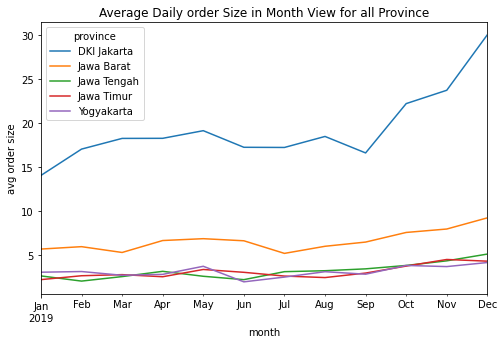

In [76]:
# [9]. Plot untuk hasil pada langkah #[8]
by_order_monthly_mean.plot(
   figsize = (8,5),
   title = 'Average Daily order Size in Month View for all Province'
)
plt.ylabel('avg order size')
plt.xlabel('month')
plt.show()

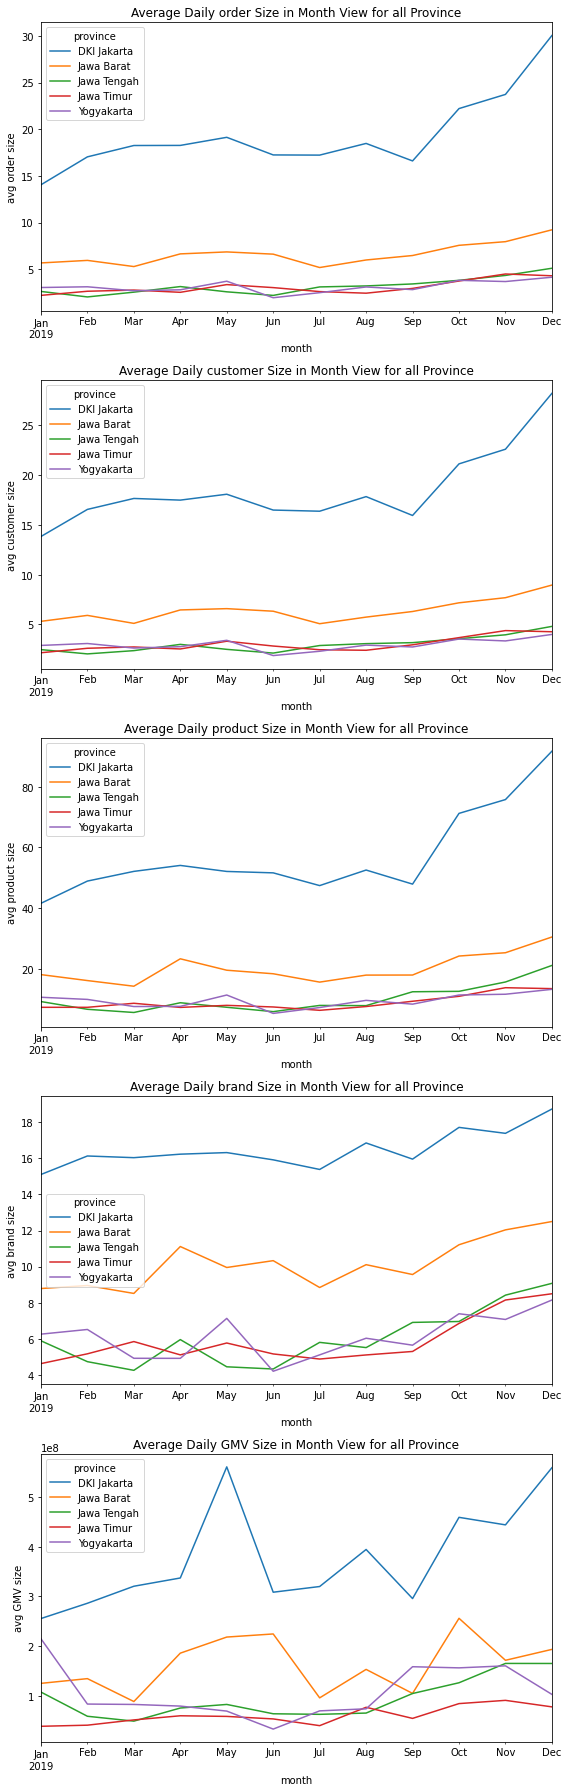

In [77]:
# Create figure canvas dan axes for 5 line plots
fig, axes = plt.subplots(5, 1, figsize=(8, 25))

# Slicing index
idx = pd.IndexSlice
for i, measurement in enumerate(groupby_city_province.columns):
    # Slicing data untuk masing-masing measurement
    by_measurement = unstack_city_province.loc[:,idx[measurement]]
    # Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
    by_measurement_monthly_mean = by_measurement.resample('M').mean()
    # Plot by_measurement_monthly_mean
    by_measurement_monthly_mean.plot(
        title = 'Average Daily ' + measurement + ' Size in Month View for all Province',
        ax = axes[i]
    )
    axes[i].set_ylabel('avg ' + measurement + ' size')
    axes[i].set_xlabel('month')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()